In [1]:
from reddit.utils import load_tfrecord
import glob
import pandas as pd
import os
import json
import seaborn as sns
from matplotlib import pyplot as plt
import gzip

Using this notebook to plot the size of datasets for the downstream subreddit classification task.

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
sns.set_style("whitegrid")

In [15]:
values = []
for i in range(31):
    print(i)
    n_trains, n_vals, n_tests = 0, 0, 0
    trains = glob.glob(f'../reddit/data/json/subreddit_classification/single_{i}/train/*')
    vals = glob.glob(f'../reddit/data/json/subreddit_classification/single_{i}/val/*')
    tests = glob.glob(f'../reddit/data/json/subreddit_classification/single_{i}/test/*')
    for f in trains:
        n_trains += len(json.load(gzip.open(f)))
    for f in vals:
        n_vals += len(json.load(gzip.open(f)))
    for f in tests:
        n_tests += len(json.load(gzip.open(f)))
    values.append({i: [n_trains, n_vals, n_tests]})

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


To df and plot

In [22]:
ndf = pd.read_csv('../reddit/data/subreddits.tsv', sep='\t')
names = ndf.head(n=31).subreddit.tolist()

In [121]:
df = pd.DataFrame([list(v.values())[0] for v in values],
                  columns=['train', 'val', 'test']).sort_values(by='train', ascending=False)
df['subreddit'] = names

In [122]:
df = df.melt(value_vars=['train','val','test'], id_vars='subreddit')
df = df.rename({'variable':'split'}, axis=1)

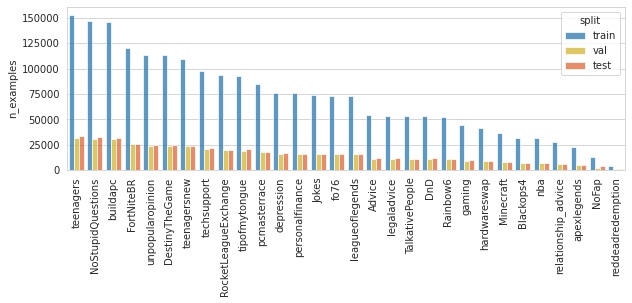

In [124]:
plt.subplots(figsize=(10,3))
sns.barplot(data=df[df['value']!=0], 
            y='value', x='subreddit',
            hue='split',
            palette=["#0073C2FF", "#EFC000FF", "#FC4E07"],
            alpha=.7)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('n_examples')
plt.show()